### Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import svm, metrics
import secrets

### Generate Gaussian Distributions

In [4]:
# Create a default random number generator
rng = np.random.default_rng(42672244757883671377369755671764847711)

gaus1 = rng.normal(loc=0.5, scale=0.5, size=(120,8))
gaus2 = rng.normal(loc=1.5, scale=1.5, size=(120,8))

print(gaus1, " ", gaus2)

[[ 7.70297863e-03  4.91167387e-01  1.35915915e+00  5.29667638e-01
   3.73745950e-02  7.66640988e-01  7.10122530e-01  1.98951494e-01]
 [ 2.40117137e-01  9.64799823e-01  4.98226817e-01  7.88864292e-01
  -3.60768158e-01  1.43552806e-01  1.41428528e-01  8.54604201e-01]
 [ 1.13820047e+00  1.01580207e+00  4.69844303e-01  1.31025324e+00
   2.28192520e-01  3.83554418e-01 -2.57750977e-01  3.41467582e-01]
 [ 6.38079610e-01 -8.51500404e-02  1.11118929e+00  1.47662415e+00
   1.18380283e+00  1.32445111e-01  4.87051646e-01  2.35488037e-01]
 [ 7.14872758e-02  2.17248793e-02  5.13915813e-01  3.89061555e-01
   1.74588526e+00  8.78668725e-01  1.12233455e+00  8.20907848e-01]
 [ 4.93572450e-01  7.30450585e-01  6.69870291e-01  6.71473766e-01
   9.27129473e-01 -1.67649083e-01  7.35715638e-01  3.56140317e-01]
 [ 7.10155530e-01  5.09229922e-02  7.78597007e-01  7.53616585e-01
  -4.66134713e-01  2.86617131e-02  1.02873448e-01  5.45601547e-01]
 [ 8.97014693e-01  6.52706137e-01  4.58670077e-01 -2.14410515e-01
   

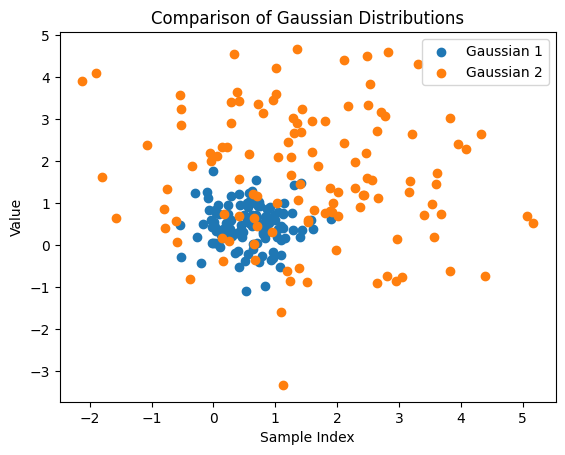

In [5]:
# Create a scatter plot to compare gaus1 and gaus2
plt.scatter(gaus1[:,0], gaus1[:,1], label = 'Gaussian 1')
plt.scatter(gaus2[:,0], gaus2[:,1], label = 'Gaussian 2')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Gaussian Distributions')
plt.legend()

# Display the plot
plt.show()

### Generate Uniform Distributions

In [7]:
uni1 = rng.uniform(low=0, high=0.4, size=(120,8))
uni2 = rng.uniform(low=0.15, high=0.5, size=(120,8))

print(uni1, " ", uni2)

[[3.98924341e-01 8.77880298e-02 2.14534958e-01 3.59075178e-01
  3.18494644e-01 3.23911989e-01 8.08179976e-02 1.12923920e-01]
 [1.65305324e-01 2.26162893e-02 1.19220844e-01 2.05395269e-01
  3.59022501e-01 2.63622501e-01 1.73016248e-01 3.02178325e-01]
 [2.04404839e-02 3.18545716e-01 1.71944528e-01 2.18702588e-01
  3.26995106e-01 8.67090008e-02 9.91080213e-02 8.30607698e-02]
 [2.43281886e-01 2.31342828e-01 1.48992025e-01 1.74706846e-01
  2.79817286e-01 1.88151971e-01 2.52774463e-01 2.53892508e-01]
 [2.05372134e-01 3.73202839e-01 1.03236335e-01 3.09542550e-01
  1.55783139e-01 1.74241978e-01 1.48963665e-01 2.35020053e-01]
 [1.88136218e-01 1.31790609e-01 2.49355525e-02 4.42197343e-02
  2.76723034e-01 7.64873891e-02 3.34012016e-01 1.01292843e-01]
 [3.43130569e-01 2.17448101e-01 1.41751648e-01 1.16756673e-01
  3.86994897e-01 2.14151302e-02 8.09106440e-02 7.43581216e-02]
 [3.91003799e-01 2.57375056e-01 2.50517043e-01 1.22826200e-01
  3.18803589e-01 1.07286736e-01 3.40220174e-01 2.43220016e-01]


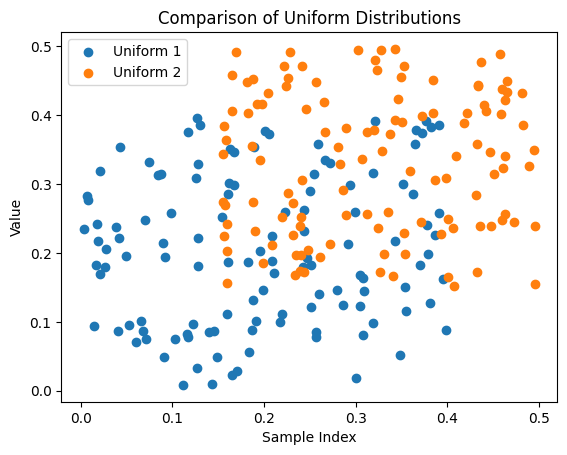

In [8]:
# Create a scatter plot to compare uni1 and uni2
plt.scatter(uni1[:,0], uni1[:,1], label = 'Uniform 1')
plt.scatter(uni2[:,0], uni2[:,1], label = 'Uniform 2')

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Comparison of Uniform Distributions')
plt.legend()

# Display the plot
plt.show()

### Generate Categorical Distribution

In [10]:
cat1 = rng.poisson(lam=1, size=(240,8))

print(cat1)

[[4 2 2 ... 0 1 0]
 [0 1 1 ... 1 1 3]
 [0 0 1 ... 0 1 1]
 ...
 [1 0 1 ... 0 1 0]
 [2 2 2 ... 3 2 1]
 [1 0 1 ... 0 0 2]]


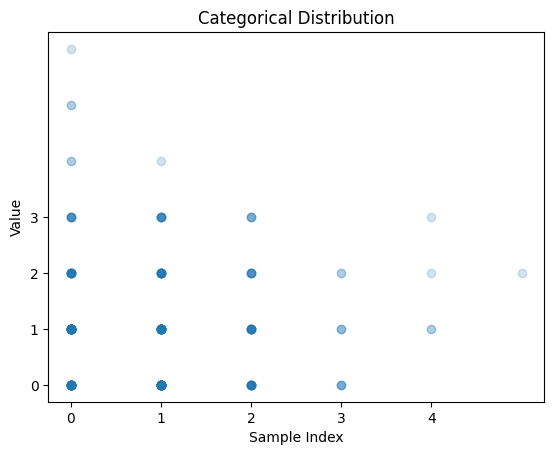

In [11]:
# Create a scatter plot to compare uni1 and uni2
plt.scatter(cat1[:,0], cat1[:,1], alpha=0.2)

# Add labels and title
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.yticks(range(0, 4))
plt.title('Categorical Distribution')
plt.xticks(range(0, 5))

# Display the plot
plt.show()

### Combine the Datasets

In [18]:
stacked_gaus = np.vstack((gaus1, gaus2))
stacked_uni = np.vstack((uni1, uni2))

zeros_column = np.zeros((120, 1)).astype(int)
ones_column = np.ones((120,1)).astype(int)
label_column = np.vstack((zeros_column, ones_column))

stacked_all = np.hstack((stacked_gaus, stacked_uni, cat1, label_column))

print(stacked_all.shape)

(240, 25)


In [20]:
combined_data = pd.DataFrame(stacked_all)
X_train, X_test, y_train, y_test = train_test_split(combined_data.iloc[:, :-1], combined_data.iloc[:, -1], test_size = 0.3, random_state = 42)
print(X_train)

           0         1         2         3         4         5         6   \
29  -0.523644 -0.273276 -0.116495  0.405252  1.197326  0.596777  0.538033   
124  1.910844  0.797754  3.256096  1.803028 -1.190719  0.792517  1.187202   
75   0.614962  1.306320 -0.156224  0.208113 -0.142056  0.331569 -0.139525   
82  -0.070894  0.848884  0.023903  0.232592  1.261394  0.678807  0.218641   
5    0.493572  0.730451  0.669870  0.671474  0.927129 -0.167649  0.735716   
..        ...       ...       ...       ...       ...       ...       ...   
106 -0.086588  1.128717  0.269658  1.574376  0.178052  0.225224  0.374495   
14   0.842969  0.304748  0.648137  0.210514  0.932452  0.412628  0.520447   
92   0.744535  0.932847  0.940564  0.920804  0.938411  0.482743  0.749997   
179  0.374667  3.646908  2.038296  1.409778  1.162723  0.751453  2.288839   
102  0.022711  0.841252  1.177467  0.208767  1.352828  0.802063  0.851066   

           7         8         9   ...        14        15   16   17   18  

In [22]:
stacked_x = np.vstack((X_train, X_test))
stacked_y = np.vstack((np.array(y_train)[:,np.newaxis], np.array(y_test)[:,np.newaxis]))

stacked_all = np.hstack((stacked_x, stacked_y))
print(stacked_all.shape)
#np.savetxt('stacked_all.csv', stacked_all, delimiter=',')

(240, 25)


In [26]:
# Create SVM classifier instance with linear kernel
clf = svm.SVC(kernel='linear', random_state = 42)

# Train the model using the training sets
clf.fit(X_train.iloc[:,0:], y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test.iloc[:,0:])

# Print predictions
print("Predictions:", y_pred)

# Calculate F1 score
print("F1 Score:", metrics.f1_score(y_test, y_pred))

Predictions: [0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
F1 Score: 0.8181818181818181
